2017年3月29日~
後から一通り見直せるように、自分用のノートとしてまとめている. このノートはhttp://docs.sympy.org/latest/tutorial/　を順になぞってまとめている.
このチュートリアルに対応する問題集が[こちら](https://github.com/sympy/scipy-2016-tutorial)で公開されている.

# Chapter 1 Introduction

### 1.1 シンボリックな計算とは何か?

Pythonの標準ライブラリ`math`モジュールでは

In [1]:
import math

In [2]:
math.sqrt(9)

3.0

という計算ができる. では8はどうか？この場合は

In [3]:
math.sqrt(8)

2.8284271247461903

となり、近似値を与える。 ただよく知っているように$$\sqrt{8}=2\sqrt{2}$$である。この結果は上の計算からは導けない。つまり、より式を簡単にして、見慣れた形にしてから近似値を出したい。-> シンボリックな計算の必要性. `Sympy`ならば

In [4]:
import sympy
sympy.sqrt(3)

sqrt(3)

と出してくれる。**近似値ではなく、数式として簡単なものがほしいとき**に、`Sympy`が使える。

### 1.2 より面白い例

`Sympy`は方程式も扱える:

In [5]:
from sympy import symbols #一変数に対してもsymbolsが使える.

In [6]:
x, y = symbols('x, y') #変数として扱いたいものにsymbols()関数を使う.

In [7]:
expr = x + 2*y

In [8]:
expr

x + 2*y

*コメント*

In [9]:
x = 4
y = 2
expr #変わらない! --> 代入操作はsubsにて. (後述)

x + 2*y

--> この変数`expr`を使えば、変数`x`, `y`を用いて、

In [10]:
expr + 1

x + 2*y + 1

In [11]:
expr - x

x + 2*y - 4

といった計算もできる。ところで、文字同士の計算にもかかわらず、`x + 2*y - x`といった結果は出なかった。-> 変数同士の演算も可能

ところで`expr`に`x`をかけてみると、

In [12]:
x*expr

4*x + 8*y

と得られる。展開した式がほしいときは、`expand`関数を用いて

In [13]:
from sympy import expand

In [14]:
expr_expand = expand(x*expr)

In [15]:
expr_expand

4*x + 8*y

とすればよい。逆に因数をまとめて整理したいときは、`factor`関数を用いて

In [16]:
from sympy import factor

In [17]:
factor(expr_expand)

4*(x + 2*y)

とすればよい。このように自由に表式を行き来できる。

### 1.4 強力なシンボリック計算

Sympyでは行列計算、極限、微分、積分、方程式を解く、その他もろもろが可能. LaTeXでグラフや式の出力も可能。幅広い数学の計算ができる！

In [18]:
from sympy import * #すべての関数をimport

In [19]:
x, t, z, nu = symbols('x, t, z, nu')

In [20]:
init_printing(use_unicode=True) #unicode文字を出力するため.

☆関数$$\sin(x)e^{2}$$の微分

In [21]:
diff( sin(x)*exp(x), x) #微分. 第２引数は微分する変数

☆不定積分: $$\int \, (e^{x}\sin(x) + e^{x}\cos(x))\, dx$$

In [22]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

☆定積分:$$\int_{-\infty}^{\infty}\sin(x^{2})dx$$

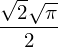

In [23]:
integrate(sin(x**2), (x, -oo, oo)) #無限大はo(オー)２つ.

☆極限: $$\lim_{x\rightarrow 0}\frac{\sin(x)}{x}$$

In [24]:
limit(sin(x)/x, x, 0) #第3引数は行き先

☆方程式:$$x^2-2=0$$を解く

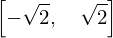

In [25]:
solve(x**2 - 2, x) #表式には=0の式を入れる.

☆微分方程式:$$\frac{d^2y}{dt^2}-y=e^{t}$$をyについて解く.

In [26]:
y = Function('y')

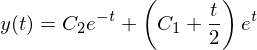

In [27]:
dsolve(Eq(y(t).diff(t,t) - y(t), exp(t)), y(t)) #左辺、右辺、求めたい関数? diff(t,t)=tの2階微分

☆行列:$$\left[
    \begin{array}{cc}
    1 & 2 \\
    2 & 2 \\
    \end{array}\right]
    $$の固有値を見つける.

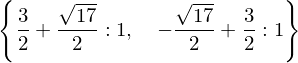

In [28]:
Matrix([[1, 2],
        [2, 2]]).eigenvals() #行列はこう書いたほうがわかりやすい。

☆ベッセル関数$$J_{\nu}(z)$$を球ベッセル関数$$j_{\nu}(z)$$を用いて書く.

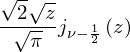

In [29]:
besselj(nu, z).rewrite(jn)

☆式: $$\int_{0}^{\pi}\cos^2(x)dx$$を$$\LaTeX$$で出力.

In [30]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'